In [1]:
import pandas as pd
df=pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df2=df.drop(['area_type','availability','society'],axis='columns')

In [3]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [4]:
df2.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [5]:
df2['balcony']=df2['balcony'].fillna(0)

In [6]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [7]:
df2.dropna(inplace=True)

In [8]:
df2.location.unique().shape

(1304,)

In [9]:
df2['BHK']=df2['size'].apply(lambda x: int(x.split(" ")[0]))

In [10]:
df2.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [11]:
df3=df2.drop('size',axis='columns')

In [12]:
df3.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [13]:
df3.describe()

,bath,balcony,price,BHK
count,13246.000000,13246.000000,13246.000000,13246.000000
mean,2.692586,1.520233,112.389392,2.801902
std,1.341506,0.859301,149.076587,1.295758
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000
50%,2.000000,2.000000,72.000000,3.000000
75%,3.000000,2.000000,120.000000,3.000000
max,40.000000,3.000000,3600.000000,43.000000


In [14]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def isFloat(num):
    try:
        float(num)
    except:
        return False
    return True

In [16]:
df3[~df3['total_sqft'].apply(lambda x:isFloat(x))]

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [17]:
import numpy as np

In [18]:
type(df3['total_sqft'][30])

str

In [19]:
def convert_to_float(str):
    arr=str.split("-")
    try:
       arr = [float(i) for i in arr]
    except:
       return None
    return np.average(arr)

In [20]:
convert_to_float("23.3-45.4")

np.float64(34.35)

In [21]:
convert_to_float("23sq")

In [22]:
df3['total_sqft']=df3['total_sqft'].apply(convert_to_float)

In [23]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [24]:
locations=df3['location'].value_counts(ascending=False)

In [25]:
locations_less_than_10=locations[locations<=10]

In [26]:
df3['location']=df3['location'].apply(lambda x:"other" if x in locations_less_than_10 else x)

In [27]:
len(df3['location'].unique())

242

In [28]:
df3.drop("balcony",axis='columns',inplace=True)

In [29]:
df3.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [30]:
df3.shape

(13246, 5)

In [31]:
df3['price_per_sqft']=df3['price']*1e5/df3['total_sqft']

In [32]:
df3.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [33]:
df4=df3[~(df3.total_sqft/df3.BHK<300)]
df4.shape

(12502, 6)

In [34]:
df4['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:


def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        mean = sub_df['price_per_sqft'].mean()
        std = sub_df['price_per_sqft'].std()
        reduced_df = sub_df[(sub_df.price_per_sqft <= (mean + std)) & 
                            (sub_df.price_per_sqft >= (mean - std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out


In [36]:
df5=remove_outliers(df4)

In [37]:
df5.head()
df5.location.unique()

array([' Devarachikkanahalli', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar',
       'Balagere', 'Banashankari', 'Banashankari Stage II',
       'Banashankari Stage III', 'Banashankari Stage V',
       'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout',
       'Bannerghatta', 'Bannerghatta Road', 'Basavangudi',
       'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road',
       'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli',
       'Billekahalli', 'Binny Pete', 'Bisuva

In [38]:
from matplotlib import pyplot as plt
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==1)]
    bhk3 = df[(df.location==location) & (df.BHK==2)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

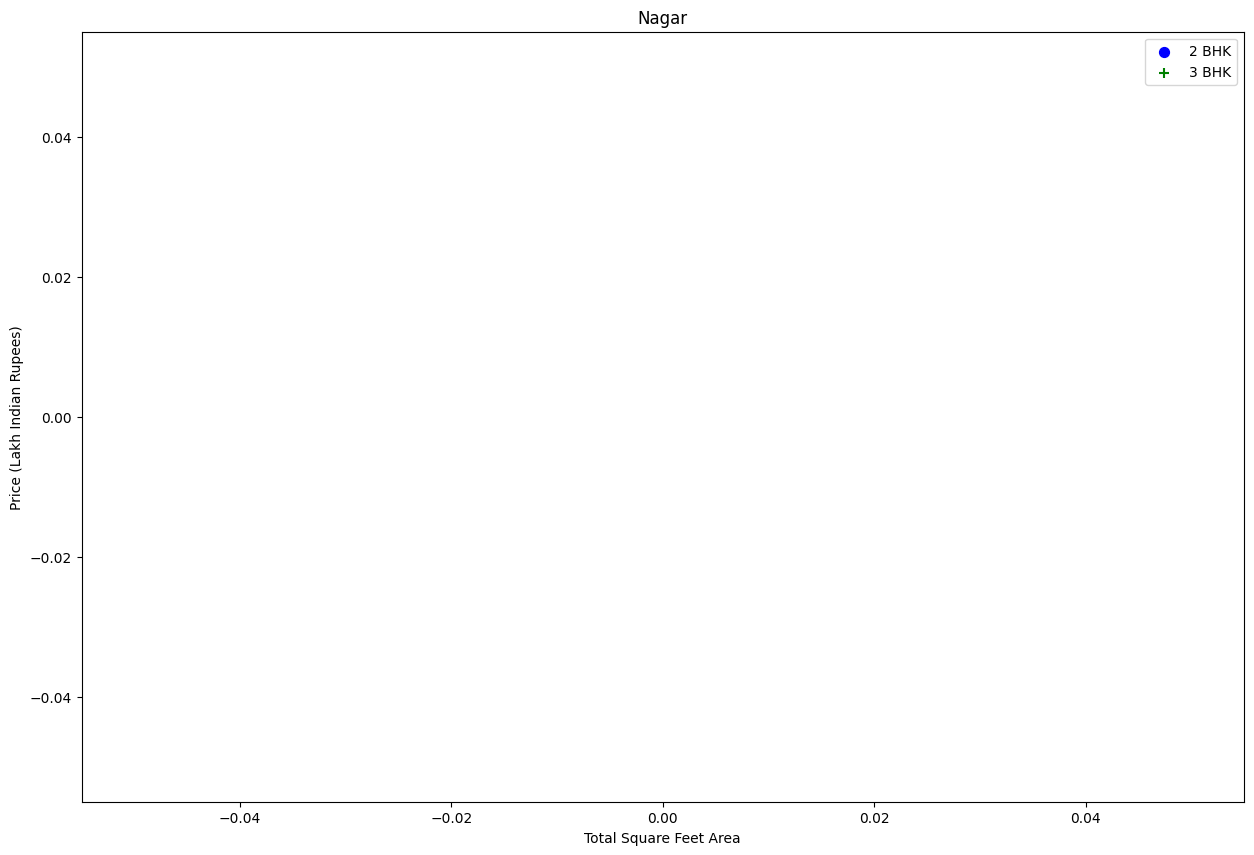

In [39]:
plot_scatter_chart(df5,"Nagar")

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [41]:
df6=remove_bhk_outliers(df5)

In [42]:
df6.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699


In [43]:
df6['BHK'].unique()

array([ 2,  3,  4,  5,  1,  6,  8,  7,  9, 10, 11, 16, 13])

In [44]:
df6.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

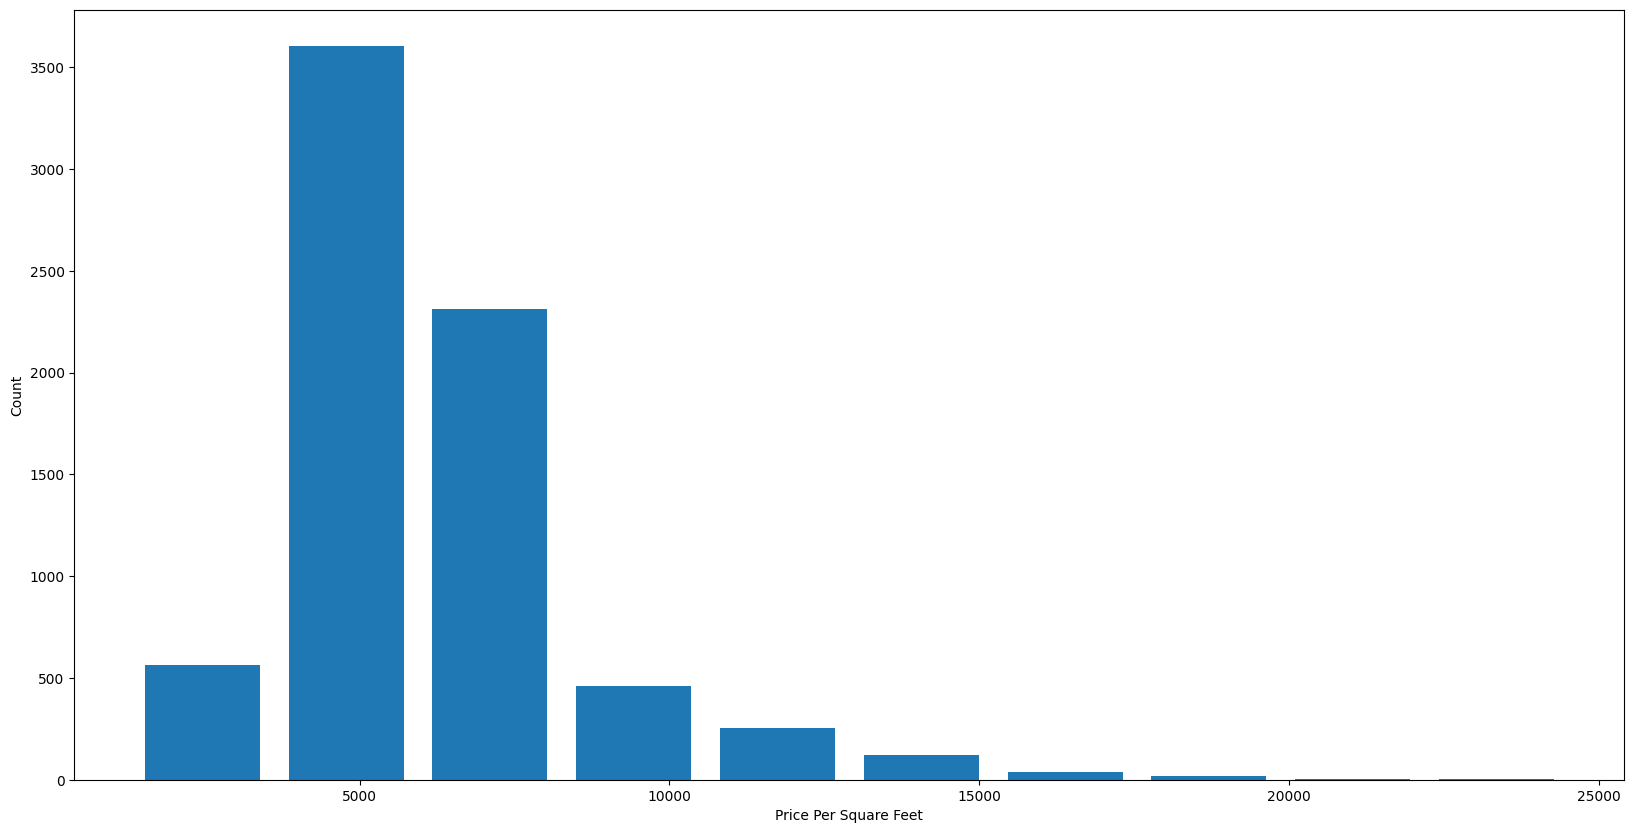

In [45]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

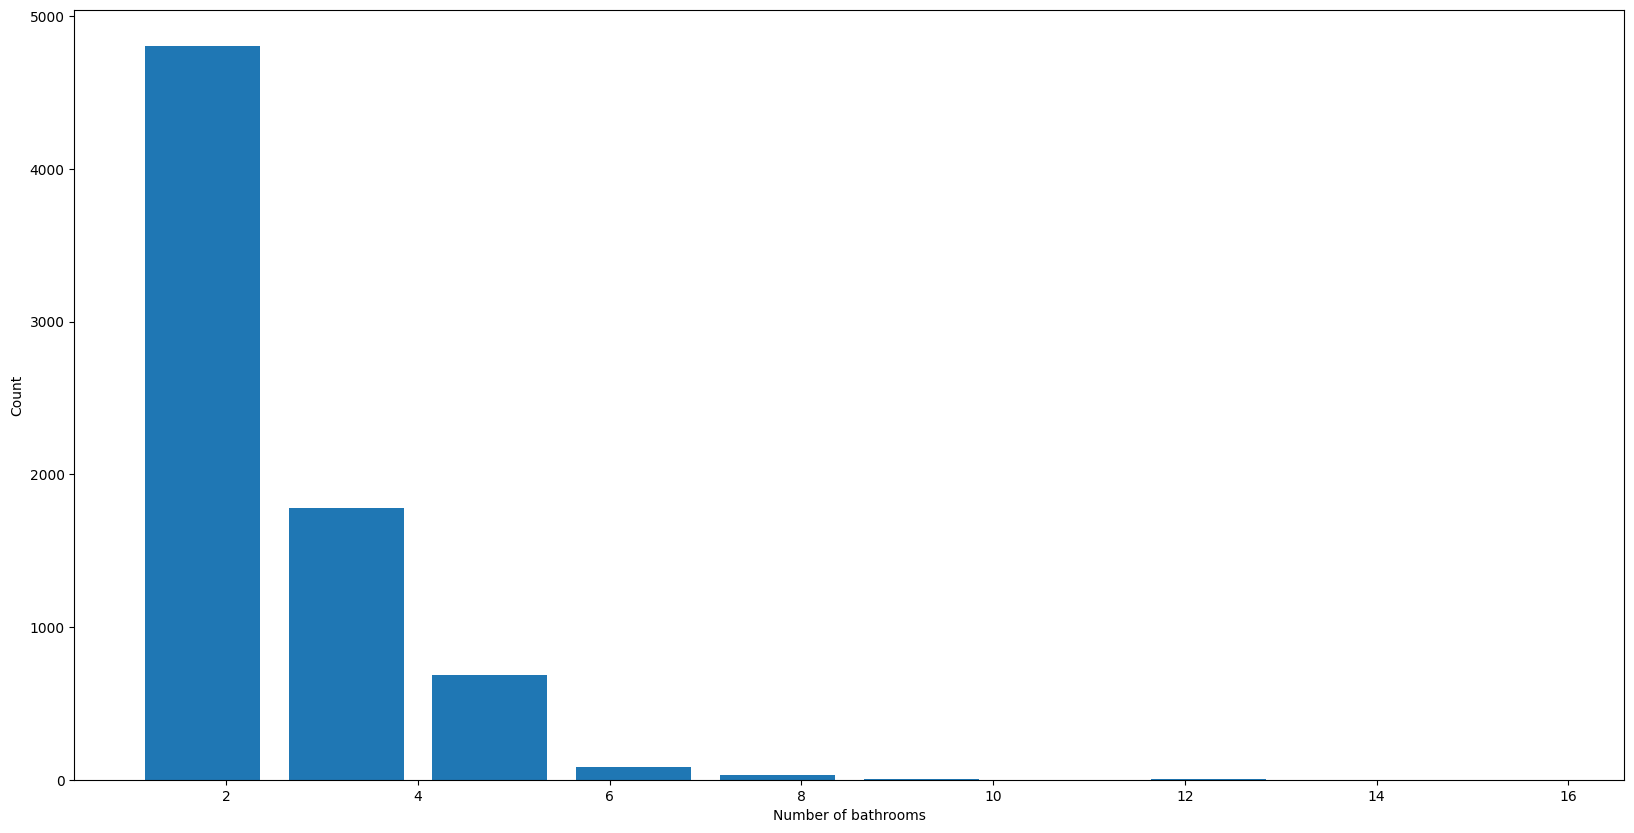

In [46]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [47]:
df6[df6.bath>10]

,location,total_sqft,bath,price,BHK,price_per_sqft
5306,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8531,other,12000.0,12.0,525.0,10,4375.000000
8620,other,10000.0,16.0,550.0,16,5500.000000
9359,other,6000.0,12.0,150.0,11,2500.000000
9691,other,5425.0,13.0,275.0,13,5069.124424


In [48]:
df7 = df6[df6.bath<df6.BHK+2]
df7.shape
df7.isna().sum()

location          0
total_sqft        0
bath              0
price             0
BHK               0
price_per_sqft    0
dtype: int64

In [49]:
df8 = df7.drop(['price_per_sqft'],axis='columns')
df8.head(3)

,location,total_sqft,bath,price,BHK
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2


In [50]:
df8.describe()

,total_sqft,bath,price,BHK
count,7309.000000,7309.000000,7309.000000,7309.000000
mean,1470.222273,2.412368,96.581378,2.484198
std,813.646329,0.940420,87.848783,0.911778
min,300.000000,1.000000,10.000000,1.000000
25%,1092.000000,2.000000,50.000000,2.000000
50%,1255.000000,2.000000,72.000000,2.000000
75%,1655.000000,3.000000,110.000000,3.000000
max,30000.000000,16.000000,2200.000000,16.000000


In [51]:
dummies = pd.get_dummies(df7.location)

In [52]:
df8 = pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df8.head()

,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,83.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,65.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Devarachikkanahalli,947.0,2.0,43.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df8.head()

,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,83.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,65.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Devarachikkanahalli,947.0,2.0,43.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
df8.drop('location',axis='columns',inplace=True)

In [55]:
df8.head()

,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,83.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,65.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,43.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df8.drop('price',axis='columns'),df8.price,test_size=0.3)

In [57]:
len(X_train)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [58]:
models={
    "Linear_Regression": {
        "model":LinearRegression(),
        "params":{
             'fit_intercept': [True, False],
            'copy_X':[True,False],
            'positive':[True,False]
        } 
    },
    "Lasso": {
        'model': Lasso(),
        'params': {
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    "Decision_Tree": {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion' : ['mse','friedman_mse'],
            'splitter': ['best','random']
        }
    }
}
df8.isna().sum()

total_sqft              0
bath                    0
price                   0
BHK                     0
 Devarachikkanahalli    0
                       ..
Yelachenahalli          0
Yelahanka               0
Yelahanka New Town      0
Yelenahalli             0
Yeshwanthpur            0
Length: 245, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
for name, model_info in models.items():
    print(f"Evaluating model: {name}")
    gsv = GridSearchCV(estimator=model_info['model'], param_grid=model_info['params'], cv=3)
    gsv.fit(X_train, y_train)
    print(f"Best Score for {name}: {gsv.best_score_}")
    print(f"Best Estimator for {name}: {gsv.best_estimator_}")
    print("-" * 50)

Evaluating model: Linear_Regression


In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
import joblib

In [ ]:
jb=joblib()
jb.dump(model,'Banglore price prediction model')

In [ ]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in .columns]
# }
# with open("columns.json","w") as f:
#     f.write(json.dumps(columns))

In [ ]:
X=df8.drop('price',axis='columns')